In [1]:
import pandas as pd
import afqinsight as afq
import numpy as np

In [2]:
nodes = pd.read_csv('../data/raw/age_data/nodes.csv')
nodes.head()

subjectID                  tractID  nodeID        rd        fa        cl  \
0  subject_000  Left Thalamic Radiation       0  0.656032  0.183053  0.081921   
1  subject_000  Left Thalamic Radiation       1  0.613308  0.247121  0.115480   
2  subject_000  Left Thalamic Radiation       2  0.574612  0.306726  0.151766   
3  subject_000  Left Thalamic Radiation       3  0.549868  0.343995  0.176124   
4  subject_000  Left Thalamic Radiation       4  0.530190  0.373869  0.194396   

         ad        md  
0  0.875535  0.729200  
1  0.909085  0.711901  
2  0.944572  0.697932  
3  0.966964  0.688900  
4  0.985039  0.681806

In [3]:
nodes[nodes['subjectID']=='subject_000'].shape

(2000, 8)

In [4]:
subjects = pd.read_csv('../data/raw/age_data/subjects.csv')
subjects.head()

Unnamed: 0    subjectID  Age  Gender Handedness     IQ  IQ_Matrix  IQ_Vocab
0           0  subject_000   20    Male        NaN  139.0       65.0      77.0
1           1  subject_001   31    Male        NaN  129.0       58.0      74.0
2           2  subject_002   18  Female        NaN  130.0       63.0      70.0
3           3  subject_003   28    Male      Right    NaN        NaN       NaN
4           4  subject_004   29    Male        NaN    NaN        NaN       NaN

In [5]:
X, y, groups, feature_names, group_names, subjects, _ = afq.datasets.load_afq_data('../data/raw/age_data', "Age")

In [6]:
y

array([20, 31, 18, 28, 29, 36, 39, 34, 24, 21, 29, 31, 28, 20, 21, 20, 31,
       32, 12, 14, 13, 12, 12, 11,  9, 14,  8, 10,  7,  8, 11, 11, 21,  9,
       24,  8,  8, 14, 10, 14,  7,  8,  9,  8,  8, 11,  6,  9,  8,  9, 32,
       16,  9,  9,  8, 15,  9, 10,  9,  8,  9, 24, 24,  9,  9, 43, 13, 44,
       50, 47, 46, 18, 40, 50, 40, 17, 17])

In [7]:
X[1].shape

(10000,)

In [8]:
X.shape
# 77 subjects
# columns are fa and md (2000 instances of each subject)

(77, 10000)

In [9]:
y # age

array([20, 31, 18, 28, 29, 36, 39, 34, 24, 21, 29, 31, 28, 20, 21, 20, 31,
       32, 12, 14, 13, 12, 12, 11,  9, 14,  8, 10,  7,  8, 11, 11, 21,  9,
       24,  8,  8, 14, 10, 14,  7,  8,  9,  8,  8, 11,  6,  9,  8,  9, 32,
       16,  9,  9,  8, 15,  9, 10,  9,  8,  9, 24, 24,  9,  9, 43, 13, 44,
       50, 47, 46, 18, 40, 50, 40, 17, 17])

In [10]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from groupyr.transform import GroupExtractor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.metrics

In [11]:
group_extractor = GroupExtractor(select=['fa', 'md'], groups=groups, group_names=group_names)
X = group_extractor.fit_transform(X)
X.shape

(77, 4000)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#X

In [13]:
X_train.shape

(57, 4000)

### Lasso

In [14]:
pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),('estimator', LassoCV(n_alphas=5))])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/Users/ceciliabarnes/opt/anaconda3/envs/direct_cnn/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.862006341088998, tolerance: 0.8132577777777779
  model = cd_fast.enet_coordinate_descent(
/Users/ceciliabarnes/opt/anaconda3/envs/direct_cnn/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.122143217572681, tolerance: 0.7102
  model = cd_fast.enet_coordinate_descent(


-0.0946233225741604

In [15]:
cross_val_score(pipeline, X, y)

/Users/ceciliabarnes/opt/anaconda3/envs/direct_cnn/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8651511819537863, tolerance: 0.865125
  model = cd_fast.enet_coordinate_descent(
/Users/ceciliabarnes/opt/anaconda3/envs/direct_cnn/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9857456835367966, tolerance: 0.8480775510204082
  model = cd_fast.enet_coordinate_descent(
/Users/ceciliabarnes/opt/anaconda3/envs/direct_cnn/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38953400583073616, tolerance: 0.20793877551020407
  model = cd_fast.enet_coordinate_descent(
/Us

array([-0.32016338,  0.01782182, -2.92530516, -0.5624851 , -0.0597728 ])

### Random Forest

In [16]:
np.random.seed(200)
n_estimator = 100
depth = 3
pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('estimator', RandomForestRegressor(n_estimators=n_estimator, max_depth=depth))])
pipeline.fit(X, y)
print("Score: ", pipeline.score(X, y))
print("Cross Validation Scores: ", cross_val_score(pipeline, X, y))

Score:  0.9144113972115762
Cross Validation Scores:  [-0.26773804  0.52820037 -0.75963549 -0.31225389 -0.15737681]


In [17]:
np.random.seed(200)
n_estimator = 100
depth = 5
pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('estimator', RandomForestRegressor(n_estimators=n_estimator, max_depth=depth))])
pipeline.fit(X, y)
print("Score: ", pipeline.score(X, y))
print("Cross Validation Scores: ", cross_val_score(pipeline, X, y))

Score:  0.9323984937461852
Cross Validation Scores:  [-0.29781577  0.52316644 -0.9195483  -0.36205744 -0.1532359 ]


In [18]:
np.random.seed(200)
n_estimator = 200
depth = 3
pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('estimator', RandomForestRegressor(n_estimators=n_estimator, max_depth=depth))])
pipeline.fit(X, y)
print("Score: ", pipeline.score(X, y))
print("Cross Validation Scores: ", cross_val_score(pipeline, X, y))

Score:  0.9204124125366833
Cross Validation Scores:  [-0.41366517  0.41674129 -1.05841284 -0.20583871 -0.12960692]


### Adaboost

In [19]:
pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),('estimator', AdaBoostRegressor())])
pipeline.fit(X, y)
pipeline.score(X, y)

0.98312348469008

In [20]:
cross_val_score(pipeline, X, y)

array([-0.97534604,  0.50960098, -0.6507859 , -0.14416439, -0.13122629])

## CNN

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

#### Messing around with data

In [22]:
X
# each row is a subject - 77 subjects
# columns are fa and md (2000 instances of each subject)

array([[0.21357297, 0.2898142 , 0.34087688, ..., 0.70245914, 0.70967451,
        0.73665818],
       [0.19058299, 0.2721342 , 0.32055065, ..., 0.72820305, 0.73652069,
        0.73947076],
       [0.24233305, 0.30895163, 0.37506668, ..., 0.70167013, 0.70817548,
        0.71672209],
       ...,
       [0.18992911, 0.24986252, 0.27899307, ..., 0.68931342, 0.69524343,
        0.70089865],
       [0.24526717, 0.31377051, 0.36500822, ..., 0.73162777, 0.73706813,
        0.73935197],
       [0.20669057, 0.2846074 , 0.33341608, ..., 0.72049506, 0.73640573,
        0.76009836]])

In [23]:
X[:, :100].T
# each column is a subject - 77 subjects
# rows are fa and md (2000 instances of each subject)

array([[0.21357297, 0.19058299, 0.24233305, ..., 0.18992911, 0.24526717,
        0.20669057],
       [0.2898142 , 0.2721342 , 0.30895163, ..., 0.24986252, 0.31377051,
        0.2846074 ],
       [0.34087688, 0.32055065, 0.37506668, ..., 0.27899307, 0.36500822,
        0.33341608],
       ...,
       [0.32112368, 0.3749538 , 0.3679477 , ..., 0.30355528, 0.32224186,
        0.37106158],
       [0.28187558, 0.29489586, 0.29894718, ..., 0.25497281, 0.28430634,
        0.28909158],
       [0.21291448, 0.20736275, 0.22126078, ..., 0.18431058, 0.2191056 ,
        0.19277788]])

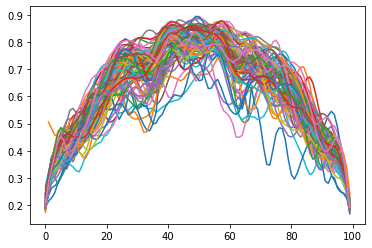

In [24]:
# each line is one subject
_ = plt.plot(X[:, :100].T)

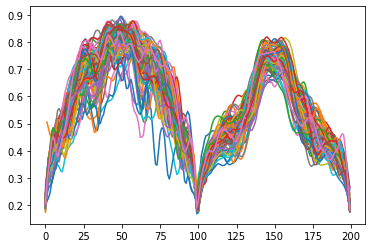

In [25]:
_ = plt.plot(X[:, :200].T)

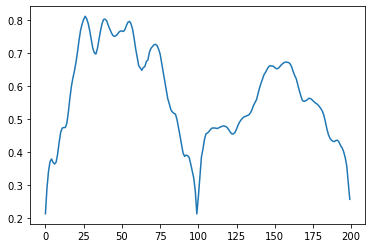

In [26]:
_ = plt.plot(X[:1, :200].T)

In [27]:
kernel = np.array([1,1,1])
result = np.zeros(202)
result

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
result[1] = np.dot(kernel, X[0, 0:3])
result[1]

0.8442640498589999

In [29]:
np.dot(kernel, X[0, 0:3])

0.8442640498589999

#### getting X into correct shape for CNN

In [30]:
x = np.convolve(X[0, :200], kernel)
x.shape

(202,)

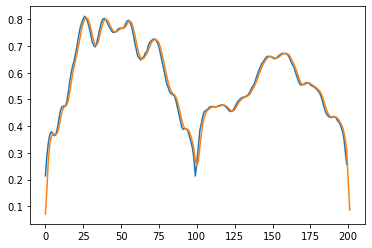

In [31]:
_ = plt.plot(X[:1, :200].T)
_ = plt.plot(x/3)

In [32]:
# transpose so that channels are last
new_x = X[0].reshape((40,100)).T
new_x.shape

(100, 40)

In [33]:
X[0].shape

(4000,)

In [34]:
X_channels = np.swapaxes(X.reshape((77, 40, 100)), 1, 2)

In [35]:
X_channels.shape[1:]

(100, 40)

In [36]:
np.allclose(X[0,:100], X_channels[0,:,0])

True

## Keras 

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

In [38]:
#group_names = [g for g in group_names if g[0] in ['md', 'fa']]
#print(len(group_names))
#print(X.shape)
#groups = groups[0:40]
group_names
#group_extractor = GroupExtractor(select=['Right Cingulum Cingulate'], groups=groups, group_names=group_names)
#X = group_extractor.fit_transform(X)

[('ad', 'Callosum Forceps Major'),
 ('ad', 'Callosum Forceps Minor'),
 ('ad', 'Left Arcuate'),
 ('ad', 'Left Cingulum Cingulate'),
 ('ad', 'Left Cingulum Hippocampus'),
 ('ad', 'Left Corticospinal'),
 ('ad', 'Left IFOF'),
 ('ad', 'Left ILF'),
 ('ad', 'Left SLF'),
 ('ad', 'Left Thalamic Radiation'),
 ('ad', 'Left Uncinate'),
 ('ad', 'Right Arcuate'),
 ('ad', 'Right Cingulum Cingulate'),
 ('ad', 'Right Cingulum Hippocampus'),
 ('ad', 'Right Corticospinal'),
 ('ad', 'Right IFOF'),
 ('ad', 'Right ILF'),
 ('ad', 'Right SLF'),
 ('ad', 'Right Thalamic Radiation'),
 ('ad', 'Right Uncinate'),
 ('cl', 'Callosum Forceps Major'),
 ('cl', 'Callosum Forceps Minor'),
 ('cl', 'Left Arcuate'),
 ('cl', 'Left Cingulum Cingulate'),
 ('cl', 'Left Cingulum Hippocampus'),
 ('cl', 'Left Corticospinal'),
 ('cl', 'Left IFOF'),
 ('cl', 'Left ILF'),
 ('cl', 'Left SLF'),
 ('cl', 'Left Thalamic Radiation'),
 ('cl', 'Left Uncinate'),
 ('cl', 'Right Arcuate'),
 ('cl', 'Right Cingulum Cingulate'),
 ('cl', 'Right Cingu

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X[:,100:], y)

In [40]:
imp = SimpleImputer(strategy='median')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

#X_train = np.swapaxes(X_train.reshape((len(X_train), 40, 100)), 1, 2)
#X_test = np.swapaxes(X_test.reshape((len(X_test), 40, 100)), 1, 2)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57, 3900), (57,), (20, 3900), (20,))

In [43]:
model = Sequential()

# input: 3+D tensor with shape: batch_shape + (steps, input_dim)
# output: 3+D tensor with shape: batch_shape + (new_steps, filters) steps value might have changed due to padding or strides.
# model.add(Conv1D(32, kernel_size=3, input_shape=X_train.shape[1:], activation='relu'))
# flatten takes feature maps and flattens it into 784 pixels, since dense doesnt care about space
#model.add(MaxPool1D(pool_size=3,padding='same'))
#model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [44]:
# The 1D convolution over sequences expects a 3D input. 
# In other words, for each element in the batch, for each time step, a single vector
#X_test.shape
# The inputs are 40-length vectors with 100 timesteps, and the batch size is 20.  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               499328    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 507,649
Trainable params: 507,649
Non-trainable params: 0
_________________________________________________________________


In [45]:
#callback = EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=100)
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Epoch 1/100
1/1 [==============================] - 1s 565ms/step - loss: 464.8301 - mean_squared_error: 464.8301 - val_loss: 294.6805 - val_mean_squared_error: 294.6805
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 258.0042 - mean_squared_error: 258.0042 - val_loss: 174.2284 - val_mean_squared_error: 174.2284
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 174.7412 - mean_squared_error: 174.7412 - val_loss: 160.5619 - val_mean_squared_error: 160.5619
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 183.1973 - mean_squared_error: 183.1973 - val_loss: 191.2643 - val_mean_squared_error: 191.2643
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 217.1033 - mean_squared_error: 217.1033 - val_loss: 194.8665 - val_mean_squared_error: 194.8665
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 257.8545 - mean_squared_error: 257.8545 - val_loss: 171.2477 - val_mean_squared_error: 

In [ ]:
y_hat = model.predict(X_train)
plt.plot(y_train, y_hat, linestyle="", marker=".")

In [ ]:
quants = pd.qcut(y_train, 5, labels=False)
for i in range(5):
    plt.plot(X_train[quants == i].mean(axis=0), label=i)
    plt.legend()